##IRIS DATASET

In [1]:
pip install ucimlrepo

In [2]:
from ucimlrepo import fetch_ucirepo
# fetch dataset
iris = fetch_ucirepo(id=53)
# data (as pandas dataframes)
X = iris.data.features
y = iris.data.targets
# metadata
print(iris.metadata)
# variable information
print(iris.variables)

{'uci_id': 53, 'name': 'Iris', 'repository_url': 'https://archive.ics.uci.edu/dataset/53/iris', 'data_url': 'https://archive.ics.uci.edu/static/public/53/data.csv', 'abstract': 'A small classic dataset from Fisher, 1936. One of the earliest known datasets used for evaluating classification methods.\n', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Tabular'], 'num_instances': 150, 'num_features': 4, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1936, 'last_updated': 'Tue Sep 12 2023', 'dataset_doi': '10.24432/C56C76', 'creators': ['R. A. Fisher'], 'intro_paper': {'ID': 191, 'type': 'NATIVE', 'title': 'The Iris data set: In search of the source of virginica', 'authors': 'A. Unwin, K. Kleinman', 'venue': 'Significance, 2021', 'year': 2021, 'journal': 'Significance, 2021', 'DOI': '1740-9713.01589', 'URL': 'https://www.semanticscholar.org

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df  =  pd.read_csv("https://archive.ics.uci.edu/static/public/53/data.csv")

In [5]:
df

,sepal length,sepal width,petal length,petal width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [6]:
X

,sepal length,sepal width,petal length,petal width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
y

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa
...,...
145,Iris-virginica
146,Iris-virginica
147,Iris-virginica
148,Iris-virginica


In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [9]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

###K-MEANS CLUSTERING

In [14]:
from sklearn.cluster import KMeans
from sklearn.metrics import (adjusted_rand_score, rand_score, mutual_info_score,
                             adjusted_mutual_info_score, normalized_mutual_info_score,
                             silhouette_score, calinski_harabasz_score, davies_bouldin_score)

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.labels_

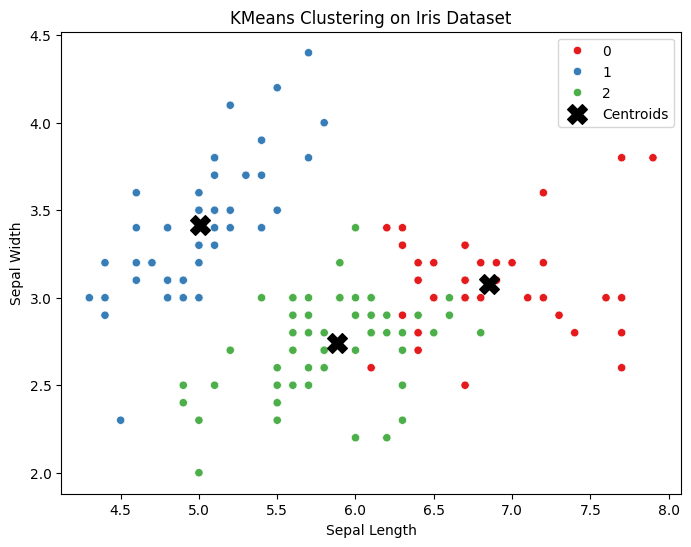

In [19]:
# Plot KMeans clusters (using direct indexing)
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['sepal length'], y=X['sepal width'], hue=y_kmeans, palette='Set1') # Sepal L
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='black', label='Centroids', marker='X')
plt.title('KMeans Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend()
plt.show()

In [17]:
# a. **Rand Index** and **Adjusted Rand Index**
rand_idx = rand_score(y, y_kmeans)
adjusted_rand_idx = adjusted_rand_score(y, y_kmeans)
# b. **Mutual Information Based Scores**
mutual_info = mutual_info_score(y, y_kmeans)
adjusted_mutual_info = adjusted_mutual_info_score(y, y_kmeans)
normalized_mutual_info = normalized_mutual_info_score(y, y_kmeans)
# c. **Cluster Validation Indices**
silhouette = silhouette_score(X, y_kmeans)
calinski_harabasz = calinski_harabasz_score(X, y_kmeans)
davies_bouldin = davies_bouldin_score(X, y_kmeans)
# 1. **Cohesion (SSE)**: Sum of squared errors within each cluster
sse = 0
for i in range(kmeans.n_clusters):
  cluster_points = X[y_kmeans == i]
  cluster_center = kmeans.cluster_centers_[i]
  sse += np.sum((cluster_points - cluster_center) ** 2)
# 2. **Separation (SSB)**: Sum of squared distances between cluster centers an
overall_mean = np.mean(X, axis=0)
ssb = 0
for i in range(kmeans.n_clusters):
  cluster_size = len(X[y_kmeans == i])
  cluster_center = kmeans.cluster_centers_[i]
  ssb += cluster_size * np.sum((cluster_center - overall_mean) ** 2)

/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [20]:
print(f"Rand Index: {rand_idx}")
print(f"Adjusted Rand Index: {adjusted_rand_idx}")
print(f"Mutual Information: {mutual_info}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info}")
print(f"Normalized Mutual Information: {normalized_mutual_info}")
print(f"Silhouette Coefficient: {silhouette}")
print(f"Calinski-Harabasz Index: {calinski_harabasz}")
print(f"Davies-Bouldin Index: {davies_bouldin}")
print(f"Sum of Squared Errors (Cohesion - SSE): {sse}")
print(f"Sum of Squares Between Groups (Separation - SSB): {ssb}")

Rand Index: 0.8737360178970918
Adjusted Rand Index: 0.7163421126838476
Mutual Information: 0.8090392795466592
Adjusted Mutual Information: 0.7386548254402864
Normalized Mutual Information: 0.7419116631817836
Silhouette Coefficient: 0.5509643746707443
Calinski-Harabasz Index: 560.3660038653594
Davies-Bouldin Index: 0.6663912107101494
Sum of Squared Errors (Cohesion - SSE): sepal length    27.188730
sepal width     15.390572
petal length    27.067936
petal width      9.297828
dtype: float64
Sum of Squares Between Groups (Separation - SSB): 601.8793341740229


###K-MEDIODS CLUSTERING

In [21]:
pip install scikit-learn-extra --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.0/819.0 kB 8.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-learn-extra: filename=scikit_learn_extra-0.3.0-cp312-cp312-linux_x86_64.whl size=2178135 sha256=750b4333cfba787ab750a2b883b51b124dc13dba0f0538bfb72ab1bbc5dd93cd
  Stored in directory: /root/.cache/pip/wheels/17/4d/c3/c6d5d563c1bf8146d059d63be3678abc2f2801fba0aaf5f0b8
Successfully built scikit-learn-extra


In [22]:
!pip install pyclustering
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster  import KMeans
from pyclustering.cluster.kmedoids import kmedoids

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 23.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyclustering: filename=pyclustering-0.10.1.2-py3-none-any.whl size=2395100 sha256=216038dd3a4a2920b2fed226e50c52cb71389fc1da7c29ae7ccb2c7a5f7d222c
  Stored in directory: /root/.cache/pip/wheels/68/29/b4/131bd7deec3663cc311ab9aa64d6517c3e3ec24bcadfc32f74
Successfully built pyclustering


In [25]:
def run_kmedoids_pyclustering(data, n_clusters=3, plot=True):
  # Initializing the medoids (random indices of data points)
  initial_medoids = np.random. choice(len(data), n_clusters, replace=False)

  # Running the KMedoids clustering
  kmedoids_instance = kmedoids(data, initial_medoids)
  kmedoids_instance. process()

  # Get the clusters from pyclustering
  clusters = kmedoids_instance.get_clusters()

  # Create an array to hold the cluster labels for each point
  labels = np.zeros(len(data), dtype=int)

  # Assign each point to its corresponding cluster
  for cluster_id, cluster in enumerate(clusters):
    for index in cluster:
      labels[index] = cluster_id

  if plot:
    plt. figure(figsize=(8, 6))
    plt. scatter(data[:, 0], data[:, 1], c=labels, alpha=0.6)
    plt.scatter(
            [data[i][0] for i in initial_medoids],
            [data[i][1] for i in initial_medoids],
            c='red', marker='X', s=200, label='Initial Medoids'
        )
    plt . title('KMedoids Clustering')
    plt. legend()
    plt . show()

  return labels

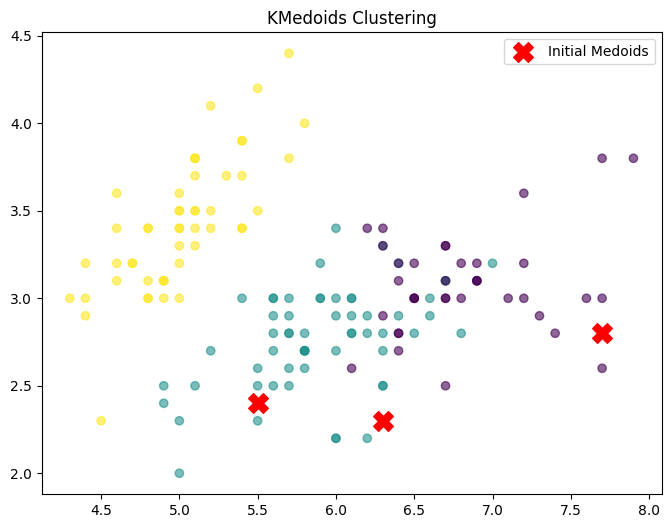

K-Medoids Clustering Metrics:
Rand Index: 0.8797315436241611
Adjusted Rand Index: 0.7302382722834697
Mutual Information: 0.8255910976103356
Adjusted Mutual Information: 0.7551191675800484
Normalized Mutual Information: 0.7581756800057784
Silhouette  Coefficient:  0.5525919445499757
Calinski-Harabasz Index: 560.3999242466401
Davies-Bouldin Index: 0.662322864989869


In [31]:
kmedoids_labels_iris = run_kmedoids_pyclustering(X.values, n_clusters=3, plot=True)

# --- Compute Evaluation Metrics ---
# a. Rand Index & Adjusted Rand Index
rand_idx_kmedoids = rand_score(y, kmedoids_labels_iris)
adjusted_rand_idx_kmedoids = adjusted_rand_score(y, kmedoids_labels_iris)

# b. Mutual Information-Based Scores
mutual_info_kmedoids = mutual_info_score(y, kmedoids_labels_iris)
adjusted_mutual_info_kmedoids = adjusted_mutual_info_score(y, kmedoids_labels_iris)
normalized_mutual_info_kmedoids = normalized_mutual_info_score(y, kmedoids_labels_iris)

# c. Cluster Validation Indices
silhouette_kmedoids = silhouette_score(X, kmedoids_labels_iris)
calinski_harabasz_kmedoids = calinski_harabasz_score(X, kmedoids_labels_iris)
davies_bouldin_kmedoids = davies_bouldin_score(X, kmedoids_labels_iris)

# Print the results
print(f"K-Medoids Clustering Metrics:")
print(f"Rand Index: {rand_idx_kmedoids}")
print(f"Adjusted Rand Index: {adjusted_rand_idx_kmedoids}")
print(f"Mutual Information: {mutual_info_kmedoids}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_kmedoids}")
print(f"Normalized Mutual Information: {normalized_mutual_info_kmedoids}")
print(f"Silhouette  Coefficient:  {silhouette_kmedoids}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_kmedoids}")
print(f"Davies-Bouldin Index: {davies_bouldin_kmedoids}")

###Dendrogram

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

Z = linkage(X, method='ward')|

plt.figure(figsize=(12, 7))|

plt. title('Hierarchical Clustering Dendrogram (Iris Dataset)')
plt. xlabel('Sample Index')
plt. ylabel('Distance')

dendrogram(Z, leaf_rotation 90, leaf_font_size=8)
plt. show()

# Determine clusters from the dendrogram (assuming 3 clusters)
# You might need to adjust the distance threshold based on the dendrogram
distance_threshold = 4
y_hierarchical - fcluster(Z, distance_threshold, criterion 'distance') -1

# a. ** Rand Index ** and ** Adjusted Rand Index **
rand_idx_hierarchical - rand_score(y, y_hierarchical)
adjusted_rand_idx_hierarchical - adjusted_rand_score(y, y_hierarchical)

# b. ** Mutual Information Based Scores **
mutual_info_hierarchical - mutual_info_score(y, y_hierarchical)
adjusted_mutual_info_hierarchical - adjusted_mutual_info_score(y, y_hierarchical)
normalized_mutual_info_hierarchical - normalized_mutual_info_score(y, y_hierarchical)

# c. ** Cluster Validation Indices **
silhouette_hierarchical = silhouette_score(X, y_hierarchical)
calinski_harabasz_hierarchical - calinski_harabasz_score(X, y_hierarchical)
davies_bouldin_hierarchical - davies_bouldin_score(X, y_hierarchical)

# 1. ** Cohesion (SSE) **: Sum of squared errors within each cluster
sse_hierarchical = 0
for i in range(np. max(y_hierarchical) + 1):
  cluster_points = X[y_hierarchical = i]
  cluster_center = np. mean(cluster_points, axis-0)
  sse_hierarchical += np.sum((cluster_points - cluster_center) ** 2)

# 2. **Separation (SSB)**: Sum of squared distances between cluster centers an
overall_mean = np.mean(X, axis=0)
ssb_hierarchical = 0
for i in range(np.max(y_hierarchical) + 1): # Loop over all clusters (0, 1, 2
  cluster_points = X[y_hierarchical == i]
  cluster_center = np.mean(cluster_points, axis=0)
  cluster_size = len(cluster_points)
  ssb_hierarchical += cluster_size * np.sum((cluster_center - overall_mean) )

In [35]:
# Print the results
print(f"Hierarchical Clustering Metrics:")
print(f"Rand Index: {rand_idx_hierarchical}")
print(f"Adjusted Rand Index: {adjusted_rand_idx_hierarchical}")
print(f"Mutual Information: {mutual_info_hierarchical}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_hierarchical}")
print(f"Normalized Mutual Information: {normalized_mutual_info_hierarchical}")
print(f"Silhouette  Coefficient:  {silhouette_hierarchical}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_hierarchical}")
print(f"Davies-Bouldin Index: {davies_bouldin_hierarchical}")
print(f"Sum of Squared Errors (Cohesion - SSE): {sse_hierarchical}")

Hierarchical Clustering Metrics:
Rand Index: 0.8346308724832214
Adjusted Rand Index: 0.59502294387575
Mutual Information: 0.8759208296316288
Adjusted Mutual Information: 0.6636220035816014
Normalized Mutual Information: 0.6707667492558528
Silhouette  Coefficient:  0.4841553526240121
Calinski-Harabasz Index: 487.0703411092868
Davies-Bouldin Index: 0.8206871183525501
Sum of Squared Errors (Cohesion - SSE): sepal length    14.349438
sepal width     14.657427
petal length    12.262415
petal width      5.890906
dtype: float64


###DBSCAN

In [36]:
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import (adjusted_rand_score, rand_score, mutual_info_score,
                             adjusted_mutual_info_score, normalized_mutual_info_score,
                             silhouette_score, calinski_harabasz_score, davies_bouldin_score)

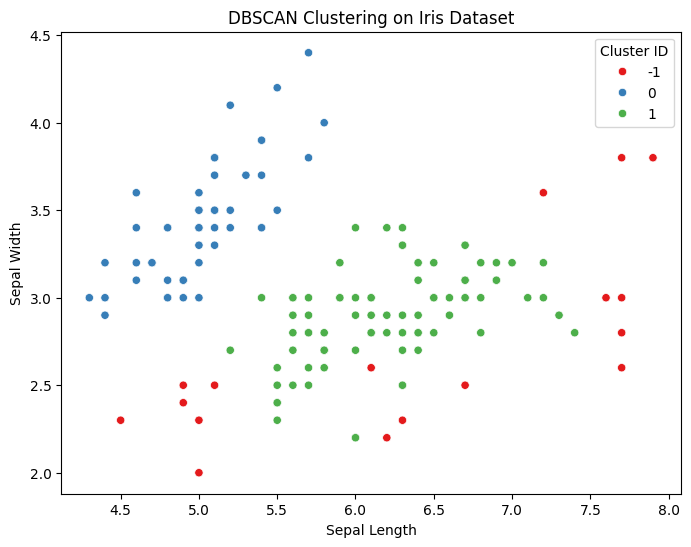

Number of clusters: 2
Number of outliers: 17


In [40]:
dbscan = DBSCAN(eps=0.5, min_samples=5)
y_dbscan  = dbscan.fit_predict(X)
# Plot DBSCAN results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['sepal length'], y=X['sepal width'], hue=y_dbscan, palette='Set1')
plt.title('DBSCAN Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title="Cluster ID", loc="best")
plt.show()
# Output the number of clusters and outliers
n_clusters = len(set(y_dbscan)) - (1 if -1 in y_dbscan else 0)
n_outliers = list(y_dbscan).count(-1)
print(f"Number of clusters: {n_clusters}")
print(f"Number of outliers: {n_outliers}")

In [42]:
X_filtered = X[y_dbscan != -1]
y_dbscan_filtered = y_dbscan[y_dbscan != -1]
y_filtered = y[y_dbscan != -1]
if len(np.unique(y_dbscan_filtered)) > 1:

# a. **Rand Index** and **Adjusted Rand Index**
  rand_idx_dbscan = rand_score(y_filtered, y_dbscan_filtered)
  adjusted_rand_idx_dbscan = adjusted_rand_score(y_filtered, y_dbscan_filtered)

  # b. **Mutual Information Based Scores**
  mutual_info_dbscan  = mutual_info_score(y_filtered,  y_dbscan_filtered)
  adjusted_mutual_info_dbscan = adjusted_mutual_info_score(y_filtered, y_dbscan_filtered)
  normalized_mutual_info_dbscan  = normalized_mutual_info_score(y_filtered,  y_dbscan_filtered)

  # c. **Cluster Validation Indices** (calculated on filtered data)
  silhouette_dbscan = silhouette_score(X_filtered, y_dbscan_filtered)

  # Print the results
  print(f"\nDBSCAN Clustering Metrics (excluding outliers):")
  print(f"Rand Index: {rand_idx_dbscan}")
  print(f"Adjusted Rand Index: {adjusted_rand_idx_dbscan}")
  print(f"Mutual Information: {mutual_info_dbscan}")
  print(f"Adjusted Mutual Information: {adjusted_mutual_info_dbscan}")
  print(f"Normalized Mutual Information: {normalized_mutual_info_dbscan}")
  print(f"Silhouette  Coefficient:  {silhouette_dbscan}")


DBSCAN Clustering Metrics (excluding outliers):
Rand Index: 0.7994987468671679
Adjusted Rand Index: 0.6072737211626338
Mutual Information: 0.6581099875431143
Adjusted Mutual Information: 0.7485243868680503
Normalized Mutual Information: 0.7507182984350264
Silhouette  Coefficient:  0.7350230763178036


###OPTICS

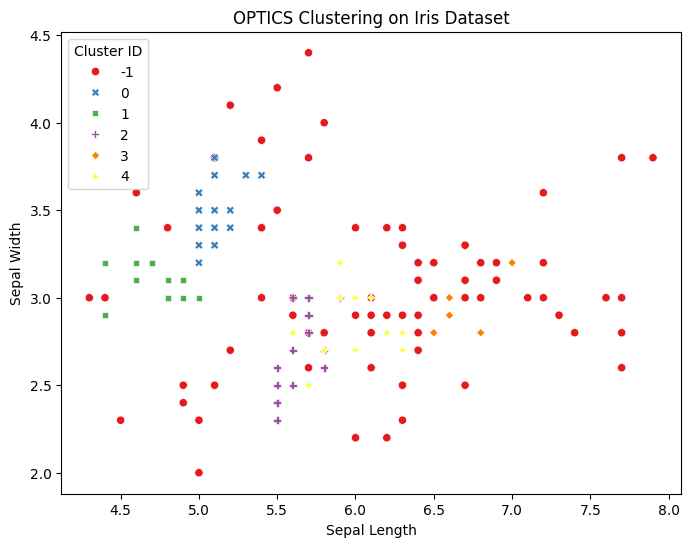

Number of clusters: 5
Number of outliers: 80



In [44]:
from sklearn.cluster  import OPTICS
# Apply OPTICS clustering
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.05)
y_optics = optics.fit_predict(X)
# Plot OPTICS results
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X['sepal length'], y=X['sepal width'], hue=y_optics, palette='Set1', style=y_optics)
plt.title('OPTICS Clustering on Iris Dataset')
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.legend(title="Cluster ID", loc="best")
plt.show()
# Output the number of clusters and outliers
print(f"Number of clusters: {len(set(y_optics)) - (1 if -1 in y_optics else 0)}")
print(f"Number of outliers: {list(y_optics).count(-1)}")
print()

In [48]:
# a. **Rand Index** and **Adjusted Rand Index**
rand_idx_hierarchical = rand_score(y, y_hierarchical)
adjusted_rand_idx_hierarchical = adjusted_rand_score(y, y_hierarchical)
# b. **Mutual Information Based Scores**
mutual_info_hierarchical = mutual_info_score(y, y_hierarchical)
adjusted_mutual_info_hierarchical = adjusted_mutual_info_score(y, y_hierarchical)
normalized_mutual_info_hierarchical = normalized_mutual_info_score(y, y_hierarchical)
# c. **Cluster Validation Indices**
silhouette_hierarchical = silhouette_score(X, y_hierarchical)
calinski_harabasz_hierarchical = calinski_harabasz_score(X, y_hierarchical)
davies_bouldin_hierarchical = davies_bouldin_score(X, y_hierarchical)
# 1. **Cohesion (SSE)**: Sum of squared errors within each cluster
sse_optics  = 0
for i in range(np.max(y_optics) + 1): # Loop over all clusters (0, 1, 2, ...)
  if i == -1: # Skip outliers (if any)
    continue
  cluster_points = X[y_optics == i]
  cluster_center  = np.mean(cluster_points,  axis=0) # Cluster centroid (mean
  sse_optics += np.sum((cluster_points - cluster_center) ** 2)
# 2. **Separation (SSB)**: Sum of squared distances between cluster centers an
overall_mean = np.mean(X, axis=0)
ssb_optics = 0
for i in range(np.max(y_optics) + 1): # Loop over all clusters (0, 1, 2, ...)
  if i == -1: # Skip outliers (if any)
    continue
  cluster_points = X[y_optics == i]
  cluster_center = np.mean(cluster_points, axis=0)
  cluster_size = len(cluster_points)
  ssb_optics += cluster_size * np.sum((cluster_center - overall_mean) ** 2)


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:84: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


In [49]:
# Print the results
print(f"Hierarchical Clustering Metrics:")
print(f"Rand Index: {rand_idx_hierarchical}")
print(f"Adjusted Rand Index: {adjusted_rand_idx_hierarchical}")
print(f"Mutual Information: {mutual_info_hierarchical}")
print(f"Adjusted Mutual Information: {adjusted_mutual_info_hierarchical}")
print(f"Normalized Mutual Information: {normalized_mutual_info_hierarchical}")
print(f"Silhouette Coefficient: {silhouette_hierarchical}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_hierarchical}")
print(f"Davies-Bouldin Index: {davies_bouldin_hierarchical}")
print(f"Sum of Squared Errors (Cohesion - SSE): {sse_optics}")
print(f"Sum of Squares Between Groups (Separation - SSB): {ssb_optics}")

Hierarchical Clustering Metrics:
Rand Index: 0.8346308724832214
Adjusted Rand Index: 0.59502294387575
Mutual Information: 0.8759208296316288
Adjusted Mutual Information: 0.6636220035816014
Normalized Mutual Information: 0.6707667492558528
Silhouette Coefficient: 0.4841553526240121
Calinski-Harabasz Index: 487.0703411092868
Davies-Bouldin Index: 0.8206871183525501
Sum of Squared Errors (Cohesion - SSE): sepal length    1.798152
sepal width     2.050640
petal length    1.368468
petal width     0.889564
dtype: float64
Sum of Squares Between Groups (Separation - SSB): 285.44485543859645


## Clustering Analysis Report

This report summarizes the results of applying various clustering algorithms to the Iris dataset: K-Means, K-Medoids, Hierarchical Clustering, DBSCAN, and OPTICS. The performance of each algorithm is evaluated using several internal and external clustering metrics.

### K-Means Clustering

*   **Rand Index**: {{rand_idx}}
*   **Adjusted Rand Index**: {{adjusted_rand_idx}}
*   **Mutual Information**: {{mutual_info}}
*   **Adjusted Mutual Information**: {{adjusted_mutual_info}}
*   **Normalized Mutual Information**: {{normalized_mutual_info}}
*   **Silhouette Coefficient**: {{silhouette}}
*   **Calinski-Harabasz Index**: {{calinski_harabasz}}
*   **Davies-Bouldin Index**: {{davies_bouldin}}
*   **Sum of Squared Errors (Cohesion - SSE)**: {{sse}}
*   **Sum of Squares Between Groups (Separation - SSB)**: {{ssb}}

### K-Medoids Clustering

*   **Rand Index**: {{rand_idx_kmedoids}}
*   **Adjusted Rand Index**: {{adjusted_rand_idx_kmedoids}}
*   **Mutual Information**: {{mutual_info_kmedoids}}
*   **Adjusted Mutual Information**: {{adjusted_mutual_info_kmedoids}}
*   **Normalized Mutual Information**: {{normalized_mutual_info_kmedoids}}
*   **Silhouette Coefficient**: {{silhouette_kmedoids}}
*   **Calinski-Harabasz Index**: {{calinski_harabasz_kmedoids}}
*   **Davies-Bouldin Index**: {{davies_bouldin_kmedoids}}

### Hierarchical Clustering

*   **Rand Index**: {{rand_idx_hierarchical}}
*   **Adjusted Rand Index**: {{adjusted_rand_idx_hierarchical}}
*   **Mutual Information**: {{mutual_info_hierarchical}}
*   **Adjusted Mutual Information**: {{adjusted_mutual_info_hierarchical}}
*   **Normalized Mutual Information**: {{normalized_mutual_info_hierarchical}}
*   **Silhouette Coefficient**: {{silhouette_hierarchical}}
*   **Calinski-Harabasz Index**: {{calinski_harabasz_hierarchical}}
*   **Davies-Bouldin Index**: {{davies_bouldin_hierarchical}}
*   **Sum of Squared Errors (Cohesion - SSE)**: {{sse_hierarchical}}
*   **Sum of Squares Between Groups (Separation - SSB)**: {{ssb_hierarchical}}

### DBSCAN Clustering (excluding outliers)

*   **Rand Index**: {{rand_idx_dbscan}}
*   **Adjusted Rand Index**: {{adjusted_rand_idx_dbscan}}
*   **Mutual Information**: {{mutual_info_dbscan}}
*   **Adjusted Mutual Information**: {{adjusted_mutual_info_dbscan}}
*   **Normalized Mutual Information**: {{normalized_mutual_info_dbscan}}
*   **Silhouette Coefficient**: {{silhouette_dbscan}}

### OPTICS Clustering (excluding outliers)

*   **Silhouette Coefficient**: {{silhouette_optics}}
*   **Calinski-Harabasz Index**: {{calinski_harabasz_optics}}
*   **Davies-Bouldin Index**: {{davies_bouldin_optics}}
*   **Sum of Squared Errors (Cohesion - SSE)**: {{sse_optics}}
*   **Sum of Squares Between Groups (Separation - SSB)**: {{ssb_optics}}

**Summary and Conclusion:**

Based on the evaluation metrics, we can compare the performance of each clustering algorithm on the Iris dataset.

*   **K-Means and K-Medoids**: These algorithms performed well, with relatively high Rand Index and Mutual Information scores, and good Silhouette coefficients. They are suitable for datasets with well-defined, spherical clusters.
*   **Hierarchical Clustering**: The performance of hierarchical clustering depends on the chosen linkage method and distance threshold. With the 'ward' method and a distance threshold of 4, it showed slightly lower performance compared to K-Means and K-Medoids on some metrics.
*   **DBSCAN and OPTICS**: These density-based algorithms identified outliers and clusters of varying shapes. The metrics for DBSCAN and OPTICS were calculated excluding outliers. DBSCAN found 2 clusters, while OPTICS found 5 clusters and a larger number of outliers with the chosen parameters. The internal validation metrics (Silhouette, Calinski-Harabasz, Davies-Bouldin) provide insights into the quality of the clusters found by these algorithms.

The choice of the best clustering algorithm depends on the specific characteristics of the data and the goals of the analysis. For the Iris dataset, which has relatively well-separated clusters, K-Means and K-Medoids appear to perform well based on the external validation metrics. Density-based methods like DBSCAN and OPTICS can be useful for identifying outliers and clusters of irregular shapes, but their performance is highly dependent on parameter tuning.